# Projet 3 - Préparez des données pour un organisme de santé publique

## Contexte & Objectifs 
### Déterminer les objectifs du nettoyage des données et de la démarche de mise en œuvre afin de construire un jeu de données adapté à une problématique métier. 

- Identifier et filtrer les variables pertinentes
- Traiter les valeurs aberrantes pour améliorer la qualité des données.
- Gérer les valeurs manquantes avec des méthodes d'imputation ***(x3)***
- Réaliser des analyses univariées pour comprendre la distribution des variables.
- Effectuer des analyses bivariées pour étudier les relations entre deux variables.
- Mener une analyse multivariée pour comprendre les interactions complexes entre variables.


### Effectuer des opérations de nettoyage sur des données structurées, notamment l’identification d’outliers et le remplissage de données manquantes, dans le respect des normes en vigueur (RGPD) afin de proposer des données exploitables pour une problématique métier.

- a 
- b 
- c

### Effectuer des analyses statistiques univariées et multivariées, notamment des tests statistiques, à partir de données structurées et nettoyées afin de présenter leur distribution, valider leur cohérence et détecter des corrélations

- a 
- b 
- c

### Représenter des données grâce à des graphiques afin d’expliciter et justifier les analyses réalisées.

- a 
- b 
- c

#### Installation des librairies

In [82]:
# %pip install pandas numpy scikit-learn matplotlib seaborn*
# %pip install skimpy
# %pip install missingno
# %pip install scipy

In [83]:
# Import des librairies
import pandas as pd
import seaborn as sns
from skimpy import skim
import missingno as msno
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Lecture du dataframe
df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')

# Faire une copie du dataframe pour garder le dataframe original intact de toute modification
df = df_origin.copy()
df.head()

C:\Users\vuill\AppData\Local\Temp\ipykernel_7548\3293951688.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Donne un aperçu des valeurs numeriques du df
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Après visualisation une premiere visualisation du dataframe grace a .describe, il semble y avoir des valeurs manquantes.

Nous allons donc afficher la heatmap des valeurs manquantes pour verifier cette hypothèse

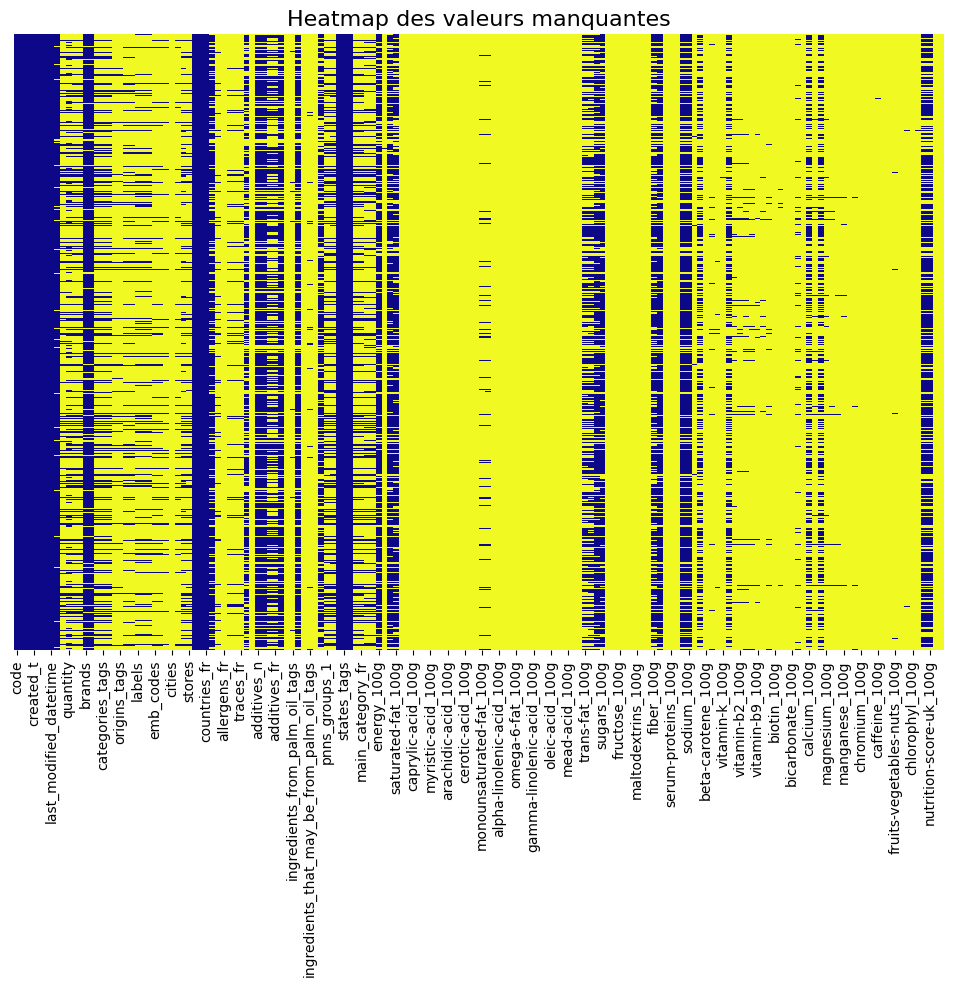

In [86]:
# Faire une Heatmap des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.sample(10_000).isnull(), cmap='plasma', cbar=False, yticklabels=False)
plt.title('Heatmap des valeurs manquantes', fontsize=16)

plt.show()


Il y a en effet beaucoup de valeurs manquantes comme nous pouvons le voir grace a la présence de la couleur jaune dans la  heatmap, nous allons donc proceder a un premier filtre du dataframe, c'est a dire supprimer les colonnes qui ont plus que 50% de valeurs manquantes. 

Pourquoi 50% ? Pour plusieurs facteur differents :

- La Pertinence des données
- Possibilité d’avoir des informations significatives.
- Plus de possibilités pour remplir ou imputer les données ("Meilleur imputation")
- Permet de conserver des variables potentiellement importantes.
- Équilibre entre nettoyage et conservation des données.
- Offre une plus grande flexibilité pour diverses méthodes d'analyse.




In [87]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percent = df.isnull().mean() * 100
X = 50

# Filtrer les colonnes qui ont plus de X% de valeurs manquantes
cols_with_many_missing = missing_percent[missing_percent > X].index

# Afficher les colonnes concernées
print(f"Colonnes avec plus de {X}% de valeurs manquantes : {len(cols_with_many_missing)}")

df = df.drop(columns=cols_with_many_missing)

# Afficher les colonnes concernées
print(f"Colonnes restante: {168 - len(cols_with_many_missing)}")

Colonnes avec plus de 50% de valeurs manquantes : 128
Colonnes restante: 40


<Axes: >

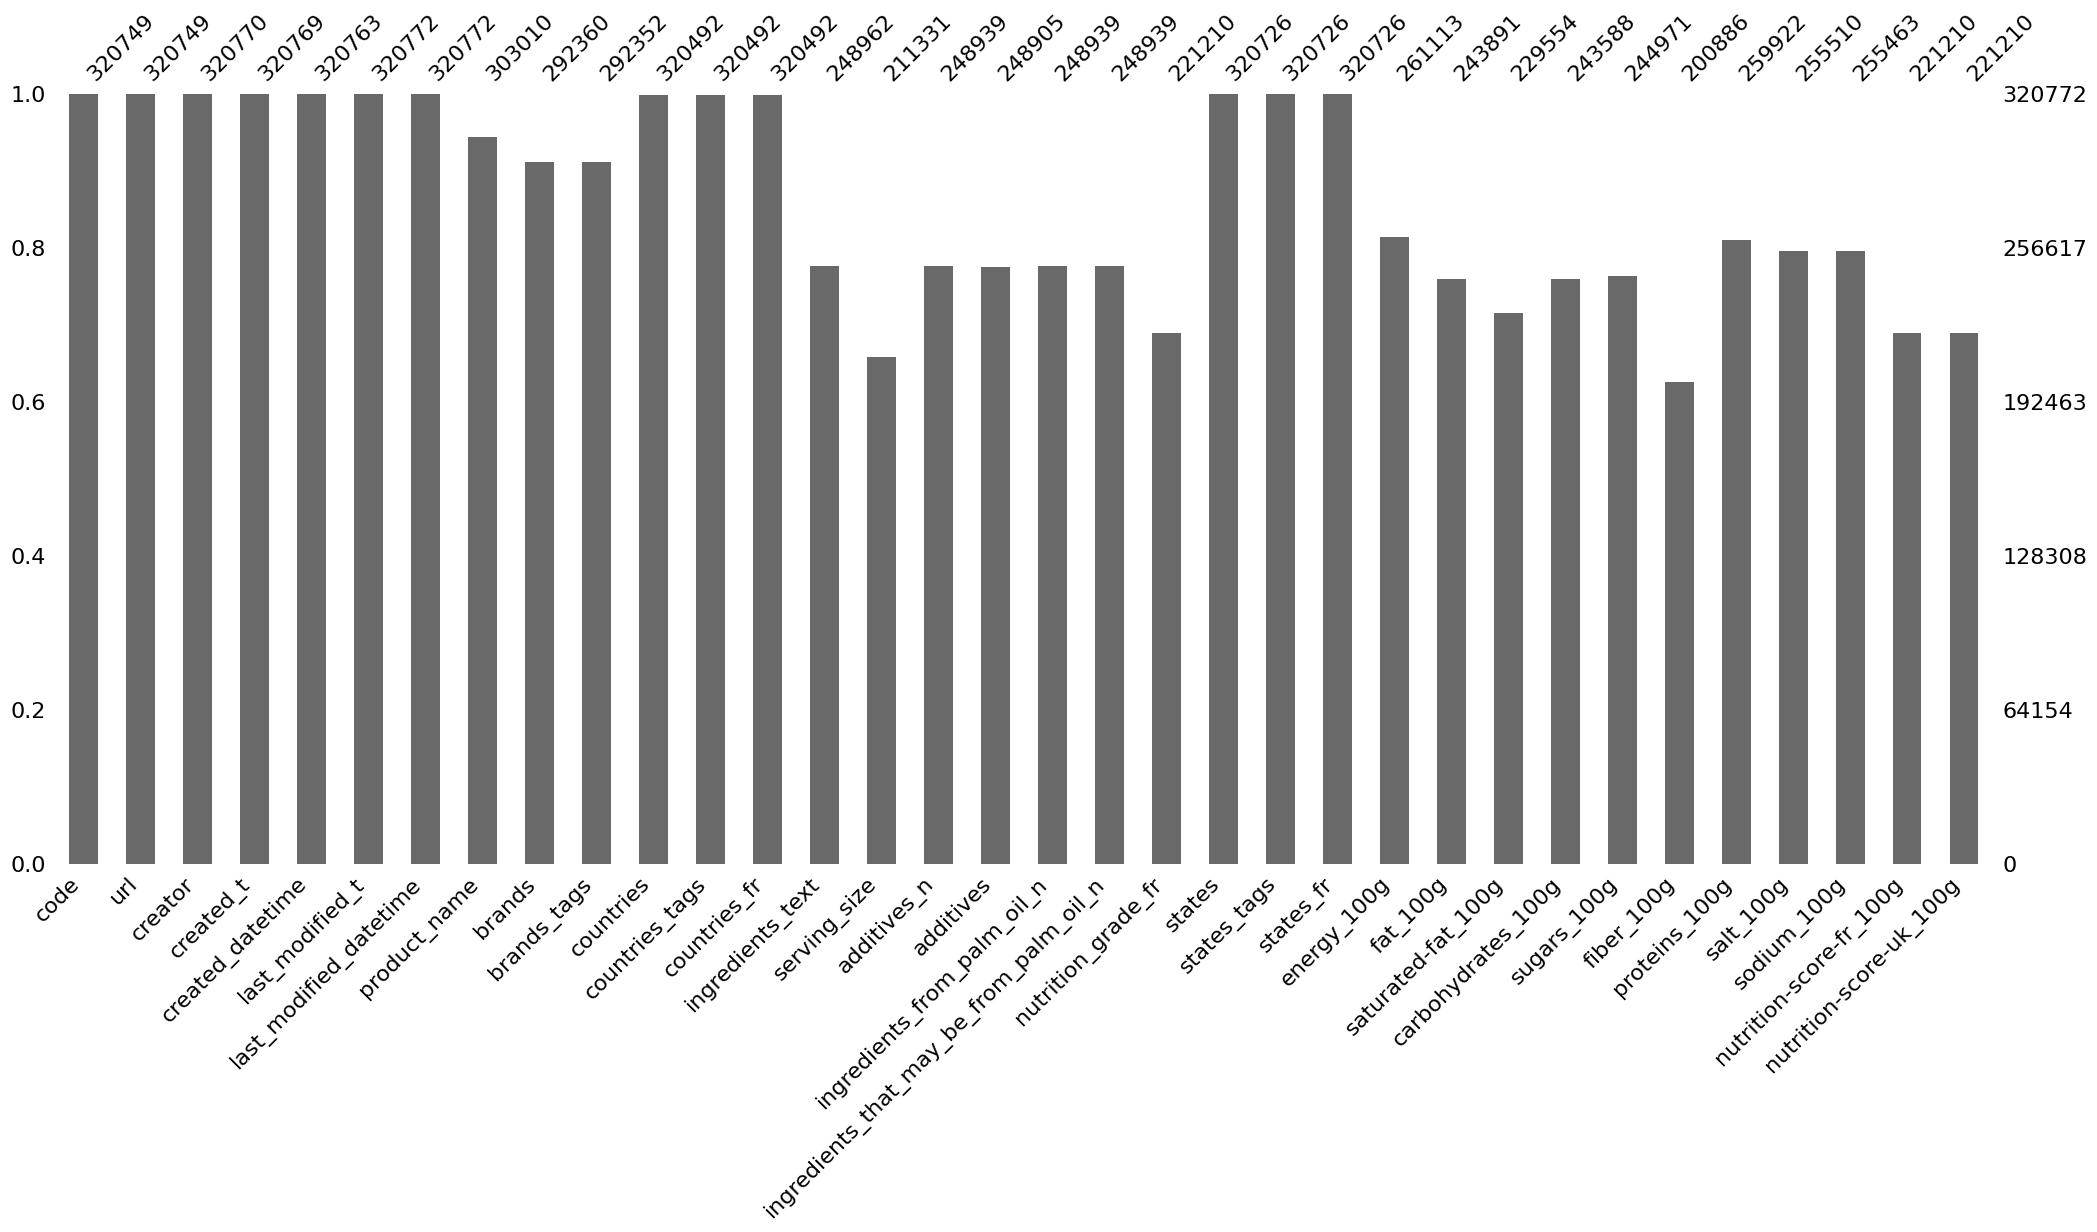

In [88]:
# Verification des valeurs manquantes après supression des colonnes vides
msno.bar(df)

Nous avons constaté qu'il y avait plus de 120 colonnes présentant plus de 50 % de valeurs manquantes. En les supprimant, nous effectuons ainsi une première sélection des données, en ne conservant que les colonnes les plus pertinentes.

Maintenant que nous avons supprimer les colonnes contenant le moins d'information, il serait pertinent de verifier si elle sont de qualité, en verifiants plusieurs point:
- Si il y a des valeurs aberantes

- Si il y a des doublons dans les colonnes et dans les lignes

- Si les unité de mesures sont correcte

Commençon par ce a quoi elle corresponde: 

# 🌍 Information générale
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **code**               | Le code unique du produit dans la base de données.                                                   |
| **url**                | L'URL du produit sur le site OpenFoodFacts.                                                          |
| **creator**            | L'identifiant ou le nom de la personne qui a créé l'entrée du produit.                               |
| **created_t**          | L'horodatage de création de l'entrée du produit.                                                     |
| **created_datetime**   | La date et l'heure de création de l'entrée du produit.                                               |
| **last_modified_t**    | L'horodatage de la dernière modification apportée à l'entrée du produit.                             |
| **last_modified_datetime** | La date et l'heure de la dernière modification apportée à l'entrée du produit.                     |

# 🏷 Marque et Pays
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **product_name**       | Le nom du produit tel qu'il est indiqué sur l'emballage ou dans la base de données.                  |
| **brands**             | La ou les marques associées au produit.                                                              |
| **brands_tags**        | Les mots-clés ou tags liés à la marque, pour faciliter la recherche et le filtrage.                  |
| **countries**          | Les pays dans lesquels le produit est disponible ou commercialisé.                                   |
| **countries_tags**     | Les mots-clés ou tags associés aux pays du produit.                                                  |
| **countries_fr**       | La version française des pays associés au produit.                                                   |

# 🍽 Ingrédients et Additifs
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **ingredients_text**   | La liste des ingrédients présents dans le produit, souvent directement copiée de l'étiquette.        |
| **serving_size**       | La taille de la portion recommandée pour le produit.                                                 |
| **additives**          | La liste des additifs alimentaires présents dans le produit.                                         |
| **additives_n**        | Le nombre total d'additifs alimentaires présents dans le produit.                                   |
| **ingredients_from_palm_oil_n** | Le nombre d'ingrédients dans le produit qui proviennent d'huile de palme.                     |
| **ingredients_that_may_be_from_palm_oil_n** | Indique si certains ingrédients peuvent provenir d'huile de palme.                 |

# 🍏 Valeurs nutritionnelles
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **energy_100g**        | L'énergie (en kilojoules) contenue dans 100 grammes du produit.                                      |
| **fat_100g**           | La quantité de graisses (en grammes) contenue dans 100 grammes du produit.                          |
| **saturated-fat_100g** | La quantité de graisses saturées (en grammes) contenue dans 100 grammes du produit.                 |
| **carbohydrates_100g** | La quantité de glucides (en grammes) contenue dans 100 grammes du produit.                          |
| **sugars_100g**        | La quantité de sucres (en grammes) contenue dans 100 grammes du produit.                            |
| **fiber_100g**         | La quantité de fibres alimentaires (en grammes) contenue dans 100 grammes du produit.               |
| **proteins_100g**      | La quantité de protéines (en grammes) contenue dans 100 grammes du produit.                         |
| **salt_100g**          | La quantité de sel (en grammes) contenue dans 100 grammes du produit.                               |
| **sodium_100g**        | La quantité de sodium (en grammes) contenue dans 100 grammes du produit.                            |
| **energy_kcal**        | L'énergie (en kilocalories) contenue dans 100 grammes du produit.                                   |

# 🏅 Scores et Étiquettes
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **nutrition_grade_fr** | La note nutritionnelle du produit, souvent exprimée sous forme de lettre, en français.               |
| **nutrition-score-fr_100g** | Le score nutritionnel du produit pour le marché français, basé sur des critères de santé.           |
| **nutrition-score-uk_100g** | Le score nutritionnel du produit pour le marché britannique, basé sur des critères de santé.        |
| **states**             | Les états ou conditions sous lesquels le produit est vendu (par exemple, bio, sans gluten).           |
| **states_tags**        | Les mots-clés ou tags associés aux états du produit.                                                 |
| **states_fr**          | La version française des états associés au produit.                                                  |

# Analyse uni/multi varié des colonnes *_100g

In [89]:
# Récuperer les colonnes de valeurs nutritionnelles (vn)
df_vn = df.filter(like='_100g')

In [90]:
df_vn.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000,221210.000000
mean,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535,9.058049
std,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903,9.183589
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000,9.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


Verifions si les données indiqué par le .describe sont coherante en nous basant sur les données de l'[European Food Safety Authority (EFSA)](https://www.efsa.europa.eu/en)

| **Colonne**                           | **Moyenne Observée** | **Unité**      | **Valeur Moyenne Tolérée** |
|---------------------------------------|----------------------|----------------|----------------------------|
| additives_n                           | 1,94                 | nombre         | 0 à 3                      |
| ingredients_from_palm_oil_n           | 0,02                 | nombre         | 0 à 1                      |
| ingredients_that_may_be_from_palm_oil_n| 0,06                 | nombre         | 0 à 1                      |
| energy_100g                           | 1141,92              | kJ             | 800 à 2500                 |
| energy_100g                           | 272,92               | kcal           | 200 à 600                  |
| fat_100g                              | 12,73                | g              | 0 à 20                     |
| saturated-fat_100g                    | 5,13                 | g              | 0 à 10                     |
| carbohydrates_100g                    | 32,07                | g              | 10 à 60                    |
| sugars_100g                           | 16,00                | g              | 0 à 30                     |
| fiber_100g                            | 2,86                 | g              | 2 à 10                     |
| proteins_100g                         | 7,08                 | g              | 5 à 25                     |
| salt_100g                             | 2,03                 | g              | 0 à 5                      |
| sodium_100g                           | 0,80                 | g              | 0 à 2                      |
| nutrition-score-fr_100g               | 9,17                 | score          | -15 à 40                   |
| nutrition-score-uk_100g               | 9,06                 | score          | -15 à 40                   |
| energy_kcal                           | 272,92               | kcal           | 100 à 500                  |


Les valeurs moyennes sont coherante par rapport au valeur tolere en UE, cepeandant pour s'assurer que les données sont coherante nous allont tracer leur diqtibution grace a undiagramme boite a moustache 

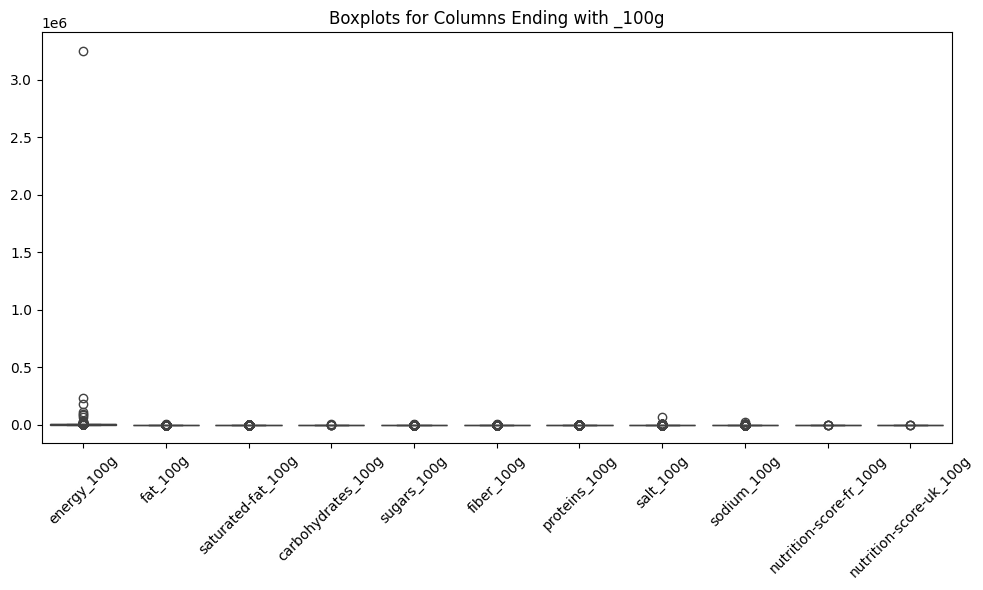

In [91]:
# Creation d'un boxplot pour chaque collone de valeur nutritionnel
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_vn)
plt.title('Boxplots for Columns Ending with _100g')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page
plt.show()  # Afficher le graphique


Nous pouvons constater que la colonne energy est encline au valeur aberantes de facon extreme,pour ne pas fausser notre analyse, on passe en echelle logarithmique pour avoir une meilleur visibilité generale et on isole la colonne energy

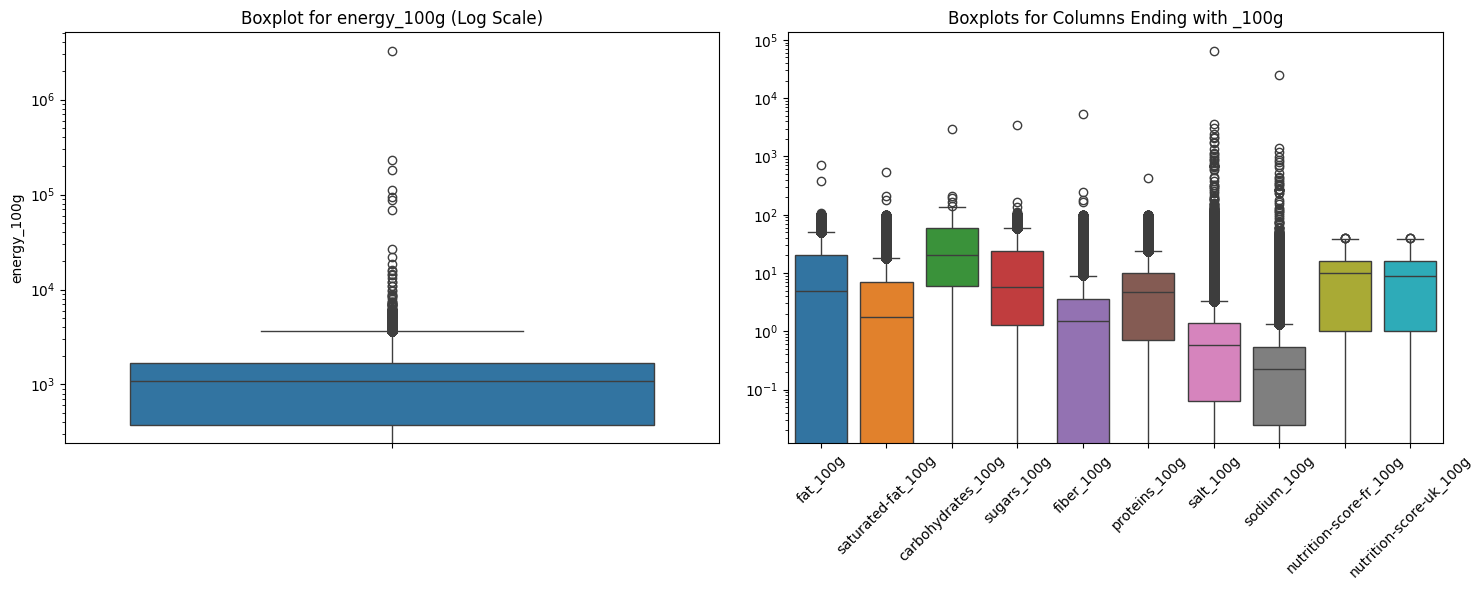

In [92]:
# suppression de la col energy_100g pour affichage
df_to_plot = df_vn.drop('energy_100g', axis=1)

# Récupérer les colonnes qui se terminent par '_100g' dans un dataframe
data_to_plot = df_to_plot.filter(like='_100g')

# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique
sns.boxplot(data=df_vn['energy_100g'], ax=axes[0])
axes[0].set_title('Boxplot for energy_100g (Log Scale)')
axes[0].set_yscale('log')  # Appliquer l'échelle logarithmique sur l'axe y



# Deuxième graphique
sns.boxplot(data=data_to_plot, ax=axes[1])
axes[1].set_title('Boxplots for Columns Ending with _100g')
axes[1].tick_params(axis='x', rotation=45) 

# Ajuster la mise en page
plt.tight_layout()  
plt.yscale('log')

# Afficher le graphique
plt.show()

Nous voyons ici des outliers or  nous savons que pour 1 produit il est impossible que sa valeur nutritionnel soit proche de 100 ou la depasse, nous somme donc sujet ici a des valeurs aberantes et non a des valeurs atypique.

PLusieurs solution s'offre donc a nous:
- Z-score
- K-means
- Isolation Forest

In [93]:
df_vn.apply(zscore)
df_vn

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
